# Preprocessing

In [96]:
import pandas as pd
import numpy as np

print("Preprocessing and cleaning data...\n")
##Read excel spread sheet of data
data = pd.read_excel('cleaned_data.xls', header=None)

##Declare the column names
data.columns = ['date', 's_and_p_comp', 'dividend', 'earnings',
                'CPI', 'fraction_date', 'long_interest_rate', 'real_price',
                'real_dividend', 'real_total_return_price','real_earnings',
                'real_scaled_earnings', 'CAPE', 'TR_CAPE', 'excess_CAPE', 'montly_bond_return',
                'real_bond_return','10_year_stock_return', '10_year_bond_return',
                '10_year_excess_return']

##Drop all rows with missing data
data = data.replace('NA',np.NaN)

data.head()

##Drop "10 year" columns so there are no rows with missing data after 2011
print("Dropping unfinished columns...")    
data = data.drop(['10_year_stock_return'],axis=1)
data = data.drop(['10_year_bond_return'],axis=1)
data = data.drop(['10_year_excess_return'],axis=1)

##Drop rows with missing data
print("Dropping unfinished rows...")
print('\n\nNumber of rows in original data = %d' % (data.shape[0]))
data = data.dropna()
print('Number of rows after discarding missing values = %d\n' % (data.shape[0]))

#Number
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d\n' % (data.shape[1]))

##Check to make sure there are no missing values in each column
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

print("\n\nPreprocessing done.")

Preprocessing and cleaning data...

Dropping unfinished columns...
Dropping unfinished rows...


Number of rows in original data = 1810
Number of rows after discarding missing values = 1687

Number of instances = 1687
Number of attributes = 17

Number of missing values:
	date: 0
	s_and_p_comp: 0
	dividend: 0
	earnings: 0
	CPI: 0
	fraction_date: 0
	long_interest_rate: 0
	real_price: 0
	real_dividend: 0
	real_total_return_price: 0
	real_earnings: 0
	real_scaled_earnings: 0
	CAPE: 0
	TR_CAPE: 0
	excess_CAPE: 0
	montly_bond_return: 0
	real_bond_return: 0


Preprocessing done.


# K-means Clustering

In [97]:
recession_data = data[(data['date'] > '2006') & (data['date'] < '2011')]
recession_data = recession_data[['date', 'real_price', 'real_scaled_earnings']]
recession_data

,date,real_price,real_scaled_earnings
1621,2006-01,1766.770556,45625.435221
1622,2006-02,1760.345828,46210.667771
1623,2006-03,1774.089539,46631.147797
1624,2006-04,1770.58446,46692.36296
1625,2006-05,1745.388308,46916.715417
1626,2006-06,1692.201032,47282.288405
1627,2006-07,1696.730472,48078.694002
1628,2006-08,1729.561257,48920.258166
1629,2006-09,1779.392252,50103.551688
1630,2006-10,1851.056905,51080.952758


These columns are taken from the data from 2006-2010. This is an interesting time period because part of it is during the Great Recession. The data will be put into three clusters.

In [98]:
from sklearn import cluster

clustering_data = recession_data.drop('date',axis=1)
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(clustering_data) 
labels = k_means.labels_
pd.DataFrame(labels, index=recession_data.date, columns=['Cluster ID'])



,Cluster ID
date,
2006-01,1
2006-02,1
2006-03,1
2006-04,1
2006-05,1
2006-06,1
2006-07,1
2006-08,1
2006-09,1


The official time of the Great Recession is December 2007 - June 2009. The clusters don't exactly line up with this but are instead delayed several months. This is probably because it took time for the recession and end of recession to affect the selected metrics.

The k-means clustering algorithm placed the non-recession dates into Cluster 1. The dates in the transtion time into and out of the recession were placed into Cluster 2. The dates that are deep in the recession were placed in Cluster 0.

# Hierarchical Clustering

In [99]:
data_1940s = data[(data['date'] > '1940') & (data['date'] < '1950')]
data_1940s = data_1940s[data_1940s['date'].str.endswith('01')]
data_1940s = data_1940s[['date', 'real_price', 'real_dividend', 'real_total_return_price', 'real_scaled_earnings']]
data_1940s

,date,real_price,real_dividend,real_total_return_price,real_scaled_earnings
829,1940-01,242.44561,12.286532,9102.749663,688.256682
841,1941-01,205.001652,13.083827,8176.869152,816.392567
853,1942-01,155.83888,12.273978,6677.484655,837.489677
865,1943-01,163.579349,9.565096,7543.642731,780.030602
877,1944-01,186.592041,9.657642,9057.591221,715.944877
889,1945-01,207.642362,9.902386,10597.586089,738.452997
901,1946-01,271.273526,10.036022,14444.546046,753.489083
913,1947-01,193.82722,9.090293,10756.19418,799.112388
925,1948-01,171.44184,9.74933,10014.797634,1109.751679
937,1949-01,175.34928,10.807121,10835.861309,1636.666552


This data represents the beginning of each year in the 1940s. WOrld War 2 went until 1944 so the earlier years of the 1940s are expected to be connected closely.

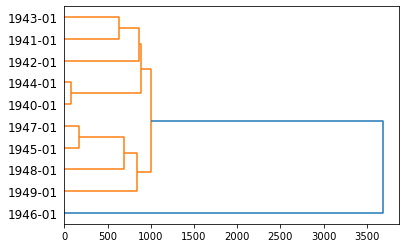

In [103]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

dates = data_1940s['date']
data_matrix = data_1940s.drop(['date'],axis=1)
linkage = hierarchy.linkage(data_matrix.values, 'single')
dn = hierarchy.dendrogram(linkage,labels=dates.tolist(),orientation='right')

The 1940s are closely connected as expected. 1940 and 1944, which are respectively close to the start and end of WW2, are very closely connected. 1946 is a large outlier. This may be due to the US economy's success after the war ended.